In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
%matplotlib inline

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
def normalize_angle(angle):
    while (angle > math.pi):
        angle = angle - 2*math.pi
    while (angle < -math.pi):
        angle = angle + 2*math.pi
    return angle


class MotionModel:
    def __init__(self, pose):
        self.pose = np.zeros_like(pose)   
        
    @property
    def pose(self):
        return self.pose
    
    @pose.setter
    def pose(self, new_pose):
        self.pose = np.copy(new_pose)
    
    @pose.deleter
    def pose(self):
        self.pose = None
        del self.pose
        
    def motion_command(self, command):
        rot1 = command[0]
        trans = command[1]
        rot2 = command[2]
        
        theta_old = normalize_angle(self.pose.item(2))
        
        update_vec = np.matrix([
            trans*math.cos(theta_old + rot1),
            trans*math.sin(theta_old + rot1),
            rot1 + rot2
        ]).T
        
        self.pose = self.pose + update_vec
        
        return self.pose

        
class BaseRobot:
    def __init__(self, x, y, theta, motion_model=None):
        self.pose = np.matrix([x, y, theta]).T
        self.motion = motion_model
    
    @property
    def pose(self):
        return self.pose
    
    @pose.setter
    def pose(self, new_pose):
        self.pose = np.copy(new_pose)
    
    @pose.deleter
    def pose(self):
        self.pose = None
        del self.pose
    
    @property
    def motion(self):
        return self.motion
    
    @motion.setter
    def motion(self, motion_model):
        self.motion = motion_model
    
    @motion.deleter
    def motion(self):
        del self.motion
        
    def do_motion(self, command):
        self.pose = self.motion.motion_command(command)

In [113]:
robot = BaseRobot(0, 0, 0)
motion_model = MotionModel(robot.pose)
robot.motion = motion_model

num_commands = 48
command = np.array([0.1, 0.1, 0.0001]).T
poses = [robot.pose]

for i in range(0, num_commands):
    robot.do_motion(command)
    poses.append(robot.pose)

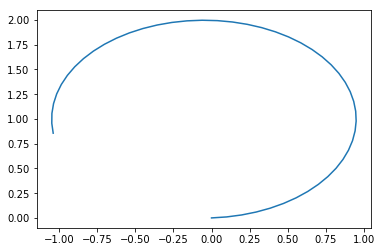

In [114]:
x = []
y = []
for pose in poses:
    x.append(pose.item(0))
    y.append(pose.item(1))
    
plt.plot(x, y)